In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [4]:
def load():
    data = pd.read_csv('datasets\Telco-Customer-Churn.csv')
    return data

In [5]:
df = load()

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* CustomerId ( Müşteri İd’si )
* Gender ( Cinsiyet )
* SeniorCitizen ( Müşterinin yaşlı olup olmadığı (1, 0) )
* Partner ( Müşterinin evli olup olmadığı (Evet, Hayır) )
* Dependents ( Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) )
* tenure ( Müşterinin şirkette kaldığı ay sayısı )
* PhoneService ( Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır) )
* MultipleLines ( Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok) )
* InternetService ( Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır) )
* OnlineSecurity ( Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok) )
* OnlineBackup ( Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok) )
* DeviceProtection ( Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok) )
* TechSupport ( Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok )
* StreamingTV ( Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok ) 
* StreamingMovies ( Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok )
* Contract ( Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl )
* PaperlessBilling ( Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır) )
* PaymentMethod ( Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik) )
* MonthlyCharges ( Müşteriden aylık olarak tahsil edilen tutar )
* TotalCharges ( Müşteriden tahsil edilen toplam tutar )
* Churn ( Müşterinin kullanıp kullanmadığı (Evet veya Hayır) ) # geçen ay veya çeyreklik dilimde ayrılan müşteriler



# Keşifçi Veri Analizi (Exploratory Data Analysis) 


 1. Genel Resim
 2. Nümerik ve kategorik değişkenlerin yakalanması
 3. Nümerik ve kategorik değişkenlerin analizi
 4. Hedef Değişken Analizi  
 (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre nümerik değişkenlerin ortalaması)
 5. Aykırı Gözlem Analizi
 6. Eksik Gözlem Analiz
 7. Korelasyon Analizi 


### 1. Genel Resim


In [7]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe([0.05, 0.50, 0.95, 0.99]).T)

In [8]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes  

In [9]:
# TotalCharges  : toplam tutar değişkeni. Object tipinde. Nümerik değişkene çevrilmeli.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') # Nanları es geç

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Bağımlı değişken olan Churn değerini 1 ve 0 olarak değiştir.
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

### 2. Nümerik ve kategorik değişkenlerin yakalanması

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols, num_but_cat

In [13]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [14]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

In [15]:
num_but_cat

['SeniorCitizen', 'Churn']

In [16]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
cat_but_car #modele koymayacağız

['customerID']

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1



### 3. Nümerik ve Kategorik Değişkenlerin Analizi


#### Kategorik

In [19]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
        
    print('####################################################')

In [20]:
for col in cat_cols:
    cat_summary(df, col)

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
####################################################
     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
####################################################
     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
####################################################
     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
####################################################
                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
####################################################
             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
####################################################
                     OnlineSecurity   

* Gender, Partner : Kadın-erkek, evli-bekar oranları yaklaşık %50-%50 dağılmış

* Dependents : Toplam müşterilerin yalnızca %30'unun bakmakla yükümlü olduğu kişiler var.

* PhoneService : Müşterilerin %90'ı telefon hizmeti almaktadır.

* InternetService : Müşterilerin %80'i internet servisi almaktadır.

* OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport : İnternet servisi alanların çoğunluğunun çevrimiçi güvenlik hizmeti, online yedek hizmeti, cihaz koruma hizmeti ve teknik destek almadığını gözlemliyoruz.  

* StreamingTV, StreamingMovies : İnternet servisi alanların yaklaşık %50'si TV ve film yayın hizmetlerini almakta.  

* Contract : Müşterilerin çoğu(%55) aydan aya sözleşme yapıyor. 1 yıllık ve 2 yıllık sözleşmelerde yakın sayıda müşteri bulunmakta.

* SeniorCitizen : Veri setinin  %16'sı yaşlı  müşterilerden oluşmakta.

###### Churn : Müşterilerin %26'sı geçen ay platformdan ayrılmış.


In [21]:
# Churn (1) oranı %16 ların altındaysa tehlikeli! Burada öyle bir durum yok.

#### Nümerik

In [22]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


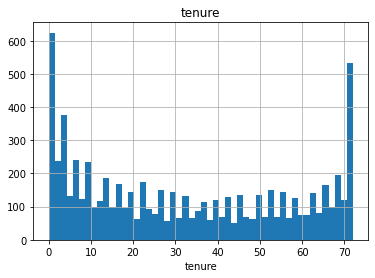

#####################################
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


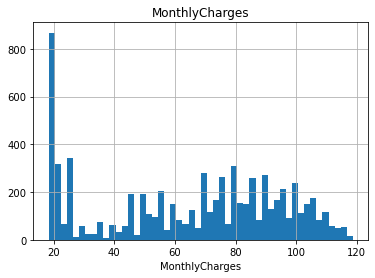

#####################################
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


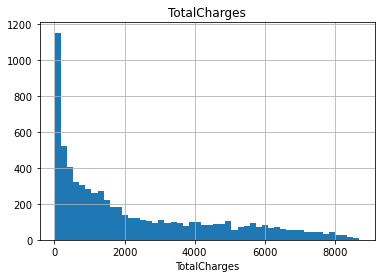

#####################################


In [23]:
for col in num_cols:
    num_summary(df, col, plot=True)

### 4. Hedef Değişken Analizi

In [24]:
# Hedef değişkene göre numerik değişkenlerin ortalaması,
# kategorik değişkenlere göre hedef değişkenin ortalaması.

#### nümerik değişkenlerin target a göre analizi

In [25]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [26]:
for col in num_cols:
    target_summary_with_num(df, "Churn", col)

          tenure
Churn           
0      37.569965
1      17.979133


       MonthlyCharges
Churn                
0           61.265124
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094




* tenure : Churn olmayan müşterilerin daha uzun süredir müşteri olduğunu görüyoruz.
* MonthlyCharges : Churn olan müşterilerin ort. aylık ödemelerinin daha fazla olduğunu görüyoruz.
* TotalCharges : Toplam ücret daha düşük olduğunda daha fazla kayıp var.(Churn olmayanların daha fazla kalmasını bekleriz doğal olarak toplam ücret daha fazla)

#### kategorik değişkenlerin target a göre analizi

In [27]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

In [28]:
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)


gender
        TARGET_MEAN  Count     Ratio
Female     0.269209   3488  49.52435
Male       0.261603   3555  50.47565


Partner
     TARGET_MEAN  Count     Ratio
No      0.329580   3641  51.69672
Yes     0.196649   3402  48.30328


Dependents
     TARGET_MEAN  Count      Ratio
No      0.312791   4933  70.041176
Yes     0.154502   2110  29.958824


PhoneService
     TARGET_MEAN  Count      Ratio
No      0.249267    682   9.683374
Yes     0.267096   6361  90.316626


MultipleLines
                  TARGET_MEAN  Count      Ratio
No                   0.250442   3390  48.132898
No phone service     0.249267    682   9.683374
Yes                  0.286099   2971  42.183729


InternetService
             TARGET_MEAN  Count      Ratio
DSL             0.189591   2421  34.374556
Fiber optic     0.418928   3096  43.958540
No              0.074050   1526  21.666903


OnlineSecurity
                     TARGET_MEAN  Count      Ratio
No                      0.417667   3498  49.666335
No internet ser

* gender : Kadın - Erkek Churn oranına baktığımızda herhangi bir farklılık yok. Yani bu sınıfların bir ayırıcılığı olmadığını söyleyebiliriz.
* Partner : Evli olmayanlarda Churn oranı daha yüksek (0.32)
* Dependents : Birilerine bakmayanların Churn oranı daha yüksek
* PhoneService : Herhangi ayırıcı bir kırılım gözlemlemiyoruz.
* InternetService : fiber optic alanların daha fazla Churn olduğu gözüküyor. (Büyük ihtimalle fiyat artışından dolayı kayıp yaşanmış)
* OnlineSecurity , OnlineBackup, DeviceProtection, TechSupport : Bu hizmetleri almayan müşterilerin churn oranı yüksek (Hizmet alıp almama durumu, değişken türetirken kritik rol oynayabilir!)
* Contract : Aylık aboneliği olan müşterilerin Churn oranı daha yüksek
* PaperlessBilling : Kağıtsız faturalandırmaya sahip olanların churn oranı daha yüksek
* PaymentMethod : ElectronicCheck kullanan müşteriler, diğer seçeneklere kıyasla platformdan daha fazla ayrılma eğiliminde
* SeniorCitizen : Yaşlı müşterilerde churn yüzdesi daha yüksektir

### Nümerik değişkenlerin korelasyonlarına bakalım

In [29]:
corr = df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


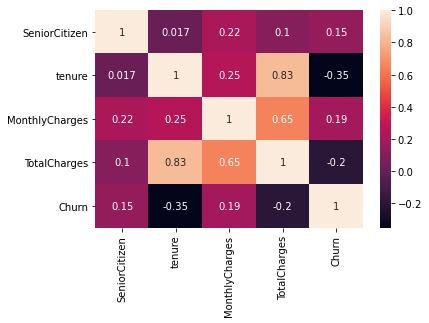

In [30]:
df.corrwith(df["Churn"]).sort_values(ascending=False)
corr_df = df.corr()

sns.heatmap(corr_df, annot=True, xticklabels=corr_df.columns, yticklabels=corr_df.columns)
plt.show()

### 5. Aykırı Gözlem Analizi

In [31]:
#eşik değer hesapla
def outlier_thresholds(dataframe, col_name, q1=0.5, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [32]:
# outlier'ları kontrol et
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [33]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [34]:
# Aykırı değer olmadığını gözlemledik.

### 6. Eksik Gözlem Analizi

In [35]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [36]:
missing_values_table(df)

              n_miss  ratio
TotalCharges      11   0.16


# Değişken Mühendisliği (Feature Engineering)

### 1. Eksik ve aykırı gözlemler için gerekli işlemler

In [37]:
#Aykırı gözlem yoktu.

##### Eksik gözlemler için 

In [38]:
# 1.YÖNTEM
# Bu 11 gözlem silinebilir.
# df.dropna().shape

In [39]:
# 2.YÖNTEM
# medyan değerleri ile doldurulabilir
# df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True) 

In [40]:
# TotalCharges'daki 11 eksik gözlemi incelediğimizde 
# bu eksik gözlemlerin tenure değerlerinin 0 olduğunu görüyoruz. Yani yeni müşteriler.
# Yeni müşteriler henüz ödeme yapmadıkları için TotalCharges değerleri 0 girilmiş,
# bunları aylık ödeyecekleri değer olan 'MonthlyCharges' değerleri ile doldurabiliriz.

In [41]:
df["TotalCharges"].fillna(df["MonthlyCharges"], inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2. Yeni değişkenler oluşturma

In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [55]:
# 1) NEW_tenure_year
# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[ df["tenure"]>48, "NEW_TENURE_YEAR"] = "4+ Year"

In [56]:
# 2)NEW_noProt
# Herhangi bir güvenlik,destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["OnlineSecurity"] != "Yes") or
                                           (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [57]:
# 3) NEW_TotalServices
# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [58]:
# 4) NEW_any_streaming
# Herhangi bir streaming hizmeti alan kişiler
df["NEW_any_streaming"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)


In [59]:
# 5)NEW_AVG_Charges
# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

In [60]:
# 6) NEW_Increase
# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [61]:
df.shape

(7043, 27)

### 3. Encoding İşlemleri

In [62]:
# değişkenlerimizi gözlemleyelim.

In [63]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 27
cat_cols: 21
num_cols: 5
cat_but_car: 1
num_but_cat: 5


In [64]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [65]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [66]:
for col in binary_cols:
    df = label_encoder(df, col)

In [67]:
cat_but_car

['customerID']

In [68]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'NEW_AVG_Charges', 'NEW_Increase']

In [69]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'Churn',
 'NEW_noProt',
 'NEW_TotalServices',
 'NEW_any_streaming']

In [70]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn"]]

In [71]:
df.shape

(7043, 27)

In [72]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [73]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [74]:
df.shape

(7043, 47)

### 4. Numerik değişkenler için standartlaştırma

In [75]:
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### 5. Model

In [76]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [78]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

In [80]:
y_pred = rf_model.predict(X_test)

In [81]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

Accuracy: 0.7861
Recall: 0.6466
Precision: 0.4686
F1: 0.5434
Auc: 0.7335


In [ ]:
# yeni oluşturduğumuz değişkenlerin etkisini gözlemleyelim

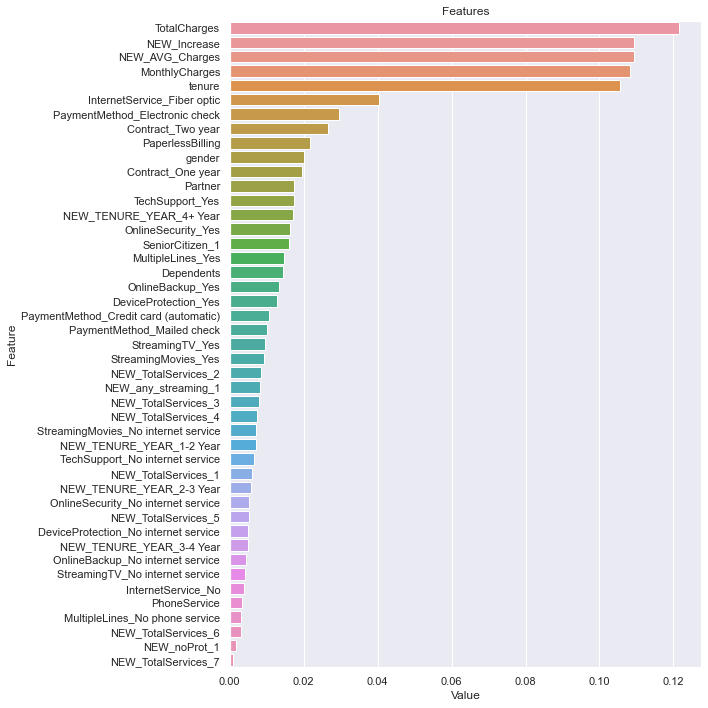

In [82]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X_train)
